# 第一课_第二周学习笔记
---

>在第一课第二周的的课程中，ng以识别图片中是否有猫为例，简单介绍了一下二分类（Binary Classification）问题，以此引出对数几率回归算法(Logistic Regression)。Logistic Regression 是一种常用的二分类问题求解算法，通常用于处理监督学习（supervised learning）相关问题。在讲解LR（Logistic Regression）算法的过程中，ng穿插着介绍了梯度下降（Gradient Descent）、导数（derivatives）、计算图（computation graph）和向量化（Vectorization）。此外，ng还特意介绍了Python中的广播（Boradcasting）机制，一种有效提高计算效率的方法，也可以认为是向量化在python中的实现。

在这份笔记中，我将先记录导数（derivatives）、计算图（computation graph）、向量化（Vectorization）等基本概念，然后记录梯度下降（Gradient Descent）相关知识，最后记录Logistic Regression算法及案例 — 识别图片中是否有猫。


### 名词约定
----
|名词|含义|
|:---:|:---|
|ng|Andrew Ng, 吴恩达老师|
|数据集|所有个案构成的集合|
|样本|数据集中的某一个案|
|特征|样本中的变量|

### 1.1 - 导数（derivative）基础
---
直观上理解，导数的意义是计算函数 $f(x)$ 在 $x_0$ 处的斜率，即$y=f(x)$的变化速率。
导数的定义如下：
<img src="images/dd1.jpg" style="width:600px">

---
基本求导法则：
<img src="images/dc1.jpg" style="width:600px">

---
函数的和、差、积、商的求导法则：
<img src="images/dc2.jpg" style="width:600px">

---
复合函数的求导法则：
<img src="images/dc4.jpg" style="width:600px">

*注：以上图片来自于同济大学编写的《高等数学（第六版）》。*


### 1.2 - 计算图（computation graph）
---
computatiom graph 是用有向箭头表示数据流动方向、方框表示计算内容的计算流程图，能够很好的描述算法的整个计算过程，对于理解算法很有帮助。ng给出的一个案例如下：
<img src="images/cg1.jpg" style="width:520px">


### 1.3 - 向量化（vectorization）
---

向量化是提高计算效率的有效方法，其核心思想是将需要循环的累加、累乘等计算任务，通过合适的数据转换（如：转置、广播、堆叠等），变成矩阵或向量计算任务。


In [1]:
import numpy as np

x1 = np.linspace(1, 100, 10000)
x2 = np.linspace(1, 10, 10000)

# 假设要计算向量x1与x2的乘积和

In [2]:
# 使用循环进行计算
%timeit -qo sum([x1[i]*x2[i] for i in range(x1.shape[0])])

<TimeitResult : 100 loops, best of 3: 5.26 ms per loop>

In [3]:
# 使用向量化方法进行计算
%timeit -qo np.dot(x1, x2)

<TimeitResult : 100000 loops, best of 3: 4.19 µs per loop>

比较以上两个计算耗时，可以发现：向量化计算x1与x2的乘积和比循环的方法块1000多倍！！！

### 2.1 - 梯度下降法（Gradient Descent）
---
梯度下降法（Gradient Descent）是一个最优化算法，通常也称为最速下降法，它将负梯度方向作为搜索方向，越接近最优化目标，步长越小，前进越慢，当步长小于一个给定的值或迭代次数达到设定的上限，迭代停止。

对于任一参数 $\theta$，使用梯度下降法的参数值更新公式为： $$ \theta = \theta - \alpha \text{ } d\theta$$其中 $\alpha$ 是学习率（learning rate）。

如果你想了解更多关于梯度下降法的知识，请点击 [wiki - Gradient descent](https://en.wikipedia.org/wiki/Gradient_descent)


### 2.2 - 随机梯度下降法（Stochastic Gradient Descent）
---
SGD的优势在于，每一次迭代中随机选取一个样本计算梯度，而不是使用全部样本。

SGD不需要记录哪些样例已经在前面的迭代过程中被访问过，有时候随机梯度下降能够直接优化期望风险，因为样例可能是随机从真正的分布中选取的。 

如果你想了解更多关于随机梯度下降法的知识，请点击 [wiki - Stochastic Gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent)



## 3 - 对数几率回归（Logistic Regression）
---
事实上，Logistic Regression是一个简单的神经网络。由于 LR 本质上是一个线性回归模型，因此 LR 主要适用于线性可分（linearly separable）的二分类问题，也可以应用于线性可分的多分类问题([案例](http://blog.csdn.net/bdss58/article/details/42065383))。

ng在讲解Logistic Regression算法时，以图像中是否有猫这个经典的二分类问题为例，将整个算法流程做了介绍，并在[作业](https://github.com/zengbin93/blog/blob/master/notes_deeplearning.ai/homework/012%20%E7%A5%9E%E7%BB%8F%E7%BD%91%E7%BB%9C%E5%92%8C%E6%B7%B1%E5%BA%A6%E5%AD%A6%E4%B9%A0_%E7%AC%AC%E4%BA%8C%E5%91%A8_%E7%BC%96%E7%A8%8B%E4%BD%9C%E4%B8%9A/assignment2_2.ipynb)中引导学习者实现了这一算法。

使用训练好的LR模型判断图片中是否有猫的过程如下图：
<img src="images/LogReg_kiank.png" style="width:400px">


### 3.1 - 符号约定
---

|符号|含义|
|:-----:|:----|
|$X$|堆叠（stack）所有输入样本得到的输入矩阵|
|$x^{(i)}$|数据集中的第 $i$ 个样本的输入向量|
|$Y$|堆叠（stack）之后的真实值（标签）向量|
|$y^{(i)}$|第 $i$ 个样本的真实值（标签）|
|$\hat{y}^{(i)}$|第 $i$ 个样本的最终预测值|
|$a^{(i)}$|训练过程中，第 $i$ 个样本的预测值|
|$A$|训练过程中，所有样本的预测值矩阵|
|$m$|输入样本数量|
|$n$|每一个样本的特征数量|
|$w_i$|第 $i$ 个特征的权重系数|
|$W$|所有特征的权重系数向量|
|$b$|线性回归中的截断误差（偏置项）|

## 3.2 - 基本概念
---
>1. Sigmoid函数
>2. 损失函数（loss function）
>3. 成本函数（cost function）

### 3.2.1 - Sigmoid函数
---
sigmoid函数是一个非线性函数，在机器学习和深度学习中都有应用，有时也称作对数几率函数（logistic function）。

sigmoid函数表达式：
$$sigmoid(x) = \sigma(x)  = \frac{1}{1+e^{-x}}$$ 

sigmoid函数的导数：
$$sigmoid\_derivative(x) = \sigma'(x) = \sigma(x) (1 - \sigma(x))$$

---
sigmoid函数及其导数的Python实现如下：

In [4]:
import numpy as np
%matplotlib inline

def sigmoid(x):
    """
    Compute the sigmoid of x

    Arguments:
    x -- A scalar or numpy array of any size

    Return:
    s -- sigmoid(x)
    """  
    s = 1.0 / (1.0 + np.exp(-x)) 
    return s


def sigmoid_derivative(x):
    """
    Compute the derivative of the sigmoid function with respect to its input x.
    
    Arguments:
    x -- A scalar or numpy array

    Return:
    ds -- Your computed gradient.
    """
    s = sigmoid(x)
    ds = s * (1 - s)    
    return ds

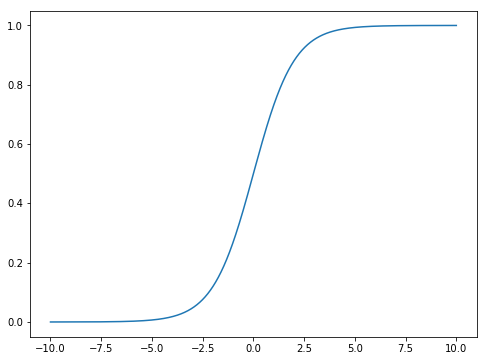

In [5]:
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 10000)
y_sigmoid = sigmoid(x)

plt.figure(figsize=(8,6))
plt.plot(x, y_sigmoid)

### 3.2.2 - 损失函数（loss function）
---
损失函数（loss function）用于计算单一样本的偏差，LR中的loss function如下：
$$ \mathcal{L}(a^{(i)}, y^{(i)}) =  - y^{(i)}  \log(a^{(i)}) - (1-y^{(i)} )  \log(1-a^{(i)})$$
其中，$a^{(i)}$ 表示第 $i$ 个样本的预测值，$y^{(i)}$ 表示第 $i$ 个样本的真实值。

### 3.2.3 - 成本函数（cost function）
---
成本函数（cost function）用于评估整个数据集的偏差，计算公式如下：
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(a^{(i)}, y^{(i)})$$
直观的理解，成本函数计算的是数据集中所有样本偏差的均值。

## 3.3 - LR模型训练过程
---
>step 1. 初始化参数 $W$ 和 $b$

>step 2. 计算当前参数对应的cost（成本）和gradient（梯度）

>step 3. 使用梯度下降法更新参数，直到迭代停止

>step 4. 得到训练好的参数，即LR模型训练完成

### 3.3.1 - 初始化参数
---
LR算法中的初始化参数有两个，分别是 $W$ 和 $b$，通常设定 $W$ 为长度为 $n$ 的零向量（即 $W=np.zeros((n, 1))$）， $b=0$。

### 3.3.2 - 计算当前参数对应的cost（成本）和gradient（梯度）
---

对于给定的参数 $W$ 和 $b$，其在当前数据集堆叠（stack）得到的输入矩阵 $X$ 上的cost计算过程如下：

---
1) 计算当前参数对应的预测值：
$$A = \sigma(w^T X + b) = (a^{(0)}, a^{(1)}, ..., a^{(m-1)}, a^{(m)})$$
2) 根据预测值和真实值，计算cost：
$$J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$$

---
gradient 计算过程如下：

---
由于LR中有两个参数，因此需要分别计算它们的梯度(导数):

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$

### 3.3.3 使用梯度下降法更新参数
---
使用梯度下降法更新参数的目标是最小化 cost function $J$，过程见下图：

<img src="images\gradient_descent.jpg" style="width:300px">

为了得到cost“最小”时对应的参数 $W$ 和 $b$，需要进行迭代计算。考虑到迭代存在不收敛的情况，引入num_iterations参数，当迭代次数大于num_iterations时，迭代停止，输出结果。此外，为了防止gradient过大引起学习曲线（learning curve）上下跳动，引入learning_rate参数，控制参数更新速度。

---
在梯度下降法中，对于任一参数 $\theta$ 的参数值更新公式为： $$ \theta = \theta - \alpha \text{ } d\theta$$其中 $\alpha$ 是学习率（learning rate）。

因此，LR中基于梯度下降法的参数更新公式如下：
$$W = W - \alpha * \frac{\partial J}{\partial w}$$
$$b = b - \alpha * \frac{\partial J}{\partial b}$$

每一次参数更新之后，重新计算cost和gradient。循环，直到迭代停止。

---
满足以下任一条件，迭代停止：
1. 迭代次数超过num_iterations
2. 参数更新步长（梯度）小于一个给定的值


### 3.3.4 输出训练好的参数，得到LR模型
---
使用梯度下降法更新参数完成之后，可以得到最终的 $W$ 和 $b$，即LR模型确定。接下来，就可以使用这个模型去进行新样本的预测了。

## 其他资源
---
1. [broadcasting - numpy](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html)
2. [Coursera吴恩达《神经网络与深度学习》课程笔记（2）-- 神经网络基础之逻辑回归](http://blog.csdn.net/red_stone1/article/details/77851177)
3. [吴恩达Coursera Deep Learning学习笔记 1 （下）](http://www.jianshu.com/p/51a5ff911c41)

